# Week 2: 2018/01/22-26

# Monday reading

Read 1.1.

Sipser uses an automatic door to illustrate a finite automaton. (The door is the type that swings open toward you, not the type that slides open.) This example is good because its state is something visible. But this automaton doesn't have accept states, because the input string has no end and the automaton's job is not to accept or reject strings. So the door is best thought of as an analogy more than a strict example.

The section "The regular operations" is slightly unusual. These closure properties are important, and where he's going with this is that these closure properties will be used to prove that any regular expression can be compiled into a finite automaton. But using DFAs, this proof is not easy and he gives up halfway. Sipser uses this as a motivation for nondeterminism, which is introduced in the next section. The proof of both Theorem 1.25 and 1.26 will turn out to be very easy.

On the other hand, the proof of Theorem 1.25 has a footnote (3) regarding closure under intersection. This is an important result and the Cartesian product construction _is_ the standard way to prove it.

# Tuesday class

## Deterministic finite automata

In the first class, I said that we would study a sequence of kinds of "computers" leading up to Turing machines. Today we'll look at the simplest of these, finite automata, which are only allowed to make a single left-to-right pass through the input.

- The machine is fed a paper tape with a string written on it.
- At each time step, it reads one symbol and moves one square to the right.
- It has only a finite number of states (another way of saying this: it uses only $O(1)$ memory).
- When it reaches the end of the string, it decides whether to accept or reject the string.

In lecture notes I'll be using a toolkit called [Tock], which displays and runs automata inside Jupyter notebooks. You are welcome to use it to tinker with automata or to write your homework assignments.

[Tock]: https://github.com/ND-CSE-30151/tock

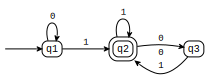

In [1]:
from tock import *
m1 = read_csv('dfa-m1.csv')
to_graph(m1)

Viewed this way, the nodes are _states_ and the edges are _transitions_. At any given time, the DFA is "in" one of its states. It starts in the _start_ state $q_1$, indicated by the arrow from nowhere. It reads in a string (say, `1101`), and for each symbol, it follows the transition (edge) labeled with that symbol. When it reaches the string, if it is in an _accept_ state (indicated by the double circle, which is supposed to look like a bullseye), it accepts the string. Otherwise, it rejects the string. We can visualize this like so:

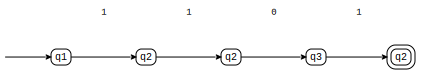

In [2]:
run(m1, "1 1 0 1")

This graph isn't a DFA; it represents the _run_ of the DFA $M_1$ on input string `1101`. Each node is a _configuration_ of the automaton (that is, being in a particular state at a particular time), and above the nodes are the input symbols that are read. Since the last node has a double circle, the automaton is in the accept state at the end of the input.

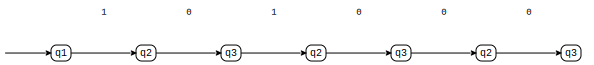

In [3]:
run(m1, "1 0 1 0 0 0")

This time, the automaton rejected the string (because the last node does not have a double circle).

More example DFAs from the book:

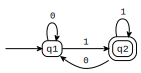

In [4]:
m2 = read_csv('dfa-m2.csv')
m2

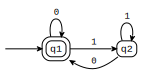

In [5]:
m3 = read_csv('dfa-m3.csv')
m3

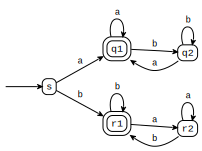

In [6]:
m4 = read_csv('dfa-m4.csv')
m4

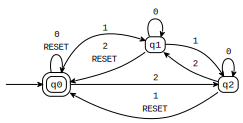

In [7]:
m5 = read_csv('dfa-m5.csv')
m5

**Question.** Write a DFA that recognizes legal C identifiers (e.g., variable names). For simplicity, assume the alphabet $\Sigma=\{\mathtt{f},\mathtt{i},\mathtt{n},\mathtt{t},\mathtt{0}\}$. Don't worry about reserved words yet.

**Question.** Write another DFA that recognizes C reserved words. For simplicity, just handle the reserved words $\mathtt{if}$ and $\mathtt{int}$.

**Question.** Modify the last DFA so that it recognizes everything **but** C reserved words.

## The product construction

The proof of Theorem 1.25 (closure under union) involves a construction sometimes called the _product construction_. It is used in a lot of proofs. For instance, its most well-known application is probably to prove closure under intersection. This result is relegated to a footnote in Sipser, so we'll expand on it a bit more here.

We're given two DFAs, $M_1$ and $M_2$, and we want to build a DFA $M$ that recognizes the language $L(M_1) \cap L(M_2)$. That is, $M$ should accept a string if and only if $M_1$ accepts it _and_ $M_2$ accepts it.

Let's use our example $M_1$ and $M_2$ from above. For clarity, let's rename the states of $M_2$ to $r_1$ and $r_2$. The basic idea is that $M$ has to simulate what $M_1$ would do and what $M_2$ would do, both at the same time. So the states of $M$ are pairs $(q, r)$, where $q$ is the simulated state of $M_1$ and $r$ is the simulated state of $M_2$.

![Figure](intersect1.svg)

The start state of $M$, then, must be $(q_1, r_1)$, which is the start state of $M_1$ and the start state of $M_2$. And the accept state (in general there could be zero or more) is $(q_3, r_2)$.

If $M$ is in the start state and it reads `1`, then $M_1$ should transition to state $q_2$, and $M_2$ should transition to state $r_2$. So $M$ should transition to state $(q_2, r_2)$:

![Figure](intersect2.svg)

Similarly, we can fill in the rest of the transitions:

![Figure](intersect3.svg)

**Question.** Combine the identifier DFA and the no-reserved-word DFA into a single DFA.

## A note on the letter _q_

We use the letter $q$ to stand for states. This usage goes back to Turing and I wish I knew why he chose this letter. But more importantly, there's some fuzziness in the way that this letter is used that I need to call attention to.

With alphabet symbols, the book makes a careful distinction between `a`, a particular symbol, and $a$, a variable standing for a symbol.

With state, the book is not so careful. Particular states are almost always given names $q_1, q_2,$ etc., and occasionally $q_0$ or $q_{\text{whatever}}$ or $r_1, r_2,$ etc., or other names. Variables ranging over states are usually named $q$ or $r$, but not infrequently $q_1, q_2$, etc.

To make this distinction more clear, consider the two statements:

1. In DFA $M_2$ above, $q_1 = q_2$.
2. Let $q_1$ and $q_2$ be states such that there is a transition from $q_1$ to $q_2$ on symbol `a`.

The first statement is false. $q_1$ and $q_2$ refer to particular states, and they are different states.

In the second statement, $q_1$ and $q_2$ are variables ranging over states. Here, it is completely possible for $q_1=q_2$.

This is confusing to be sure. I'll try to use the following conventions, different from the book:

- We'll write $q_1, q_2$, etc. for particular states.
- We'll use $s$ (not $q_0$) for the variable that stands for the start state (i.e., a DFA is a tuple $(Q, \Sigma, \delta, s, F)$).
- We'll use $q$ and $r$ as variables that stand for states.
- We may also use $q_i, q_j, q_k$ to stand for states. Technically, this means that we have assigned names $q_1, q_2, \ldots$ to the states, and are using variables $i, j, k$ to stand for state indices.

# Wednesday reading

Read 1.2.

# Thursday class

Homework 1 is due this evening! Also, please remember to have your project teams registered by today.

## Nondeterministic finite automata

Turing machines and deterministic finite automata were inspired by mechanical devices. It's easy to imagine building them, and many people have. But a nondeterministic automaton seems supernatural. However, mathematically, nondeterminism is pretty natural concept. A NFA accepts a string iff there exists an accepting path for it; when a DFA accepts a string, there exists a _unique_ path for it. Thought of this way, the NFA actually has the simpler definition. We will come back to the idea of nondeterminism repeatedly, but it will become of paramount importance in Unit IV.

Here's an example NFA:

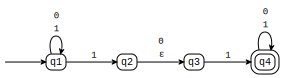

In [8]:
n1 = read_csv('nfa-n1.csv')
to_graph(n1)

There are two differences to note. First, a state can have more than one transition with the same symbol, or no transition with a certain symbol. Second, a transition can be labeled $\varepsilon$, meaning that the NFA can "spontaneously" follow this transition without reading in any input symbols.

Here's an example run, on the string `010110`:

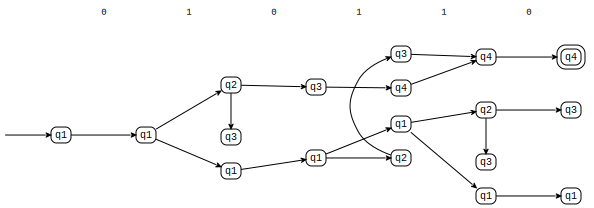

In [9]:
run(n1, "0 1 0 1 1 0")

Now the run graph (basically the same as Figure 1.29 but rotated 90 degrees) looks more complicated: because of nondeterminism, the graph has branches and there is more than one node at each time step. Also, because of epsilon transitions, there are edges within time steps.

In order for an NFA to accept a string, only one path needs to accept it. The other paths can dead-end, or they can even loop forever, like this:

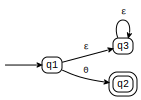

In [10]:
n = read_csv("nfa-loop.csv")
to_graph(n)

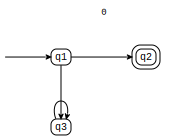

In [11]:
run(n, "0")

**Question.** Last time, we saw how, if a DFA recognizes language $L$, then flipping the accept and non-accept states causes it to recognize $L^C$. Do the same thing to $N_1$ and see what language it recognizes. What happened?

More example NFAs from the book:

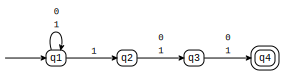

In [12]:
n2 = read_csv('nfa-n2.csv')
n2

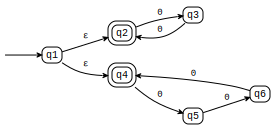

In [13]:
n3 = read_csv('nfa-n3.csv')
n3

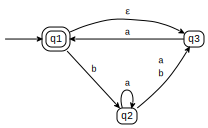

In [14]:
n4 = read_csv('nfa-n4.csv')
n4

## Equivalence with DFA

NFAs seem like they might be a lot more powerful than DFAs, in the sense that they might accept more languages than DFAs do. (Recall: the question is not whether NFAs can accept more _strings_, because clearly we can design either a DFA or a NFA that accepts all strings. The question is whether NFAs can accept more _languages_.) Perhaps surprisingly, the answer is no. 

Any NFA can be converted to an equivalent DFA by what is commonly known as the _subset construction_. The idea is that the DFA simulates what states the NFA _could_ be in at any point in time. The book explains this clearly (you might prefer to read Example 1.41 before the formal construction in Theorem 1.39), so we don't discuss it here. But here's the final result of determinizing $N_4$:

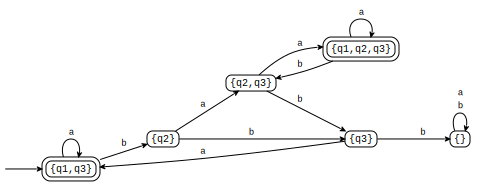

In [15]:
n4 = read_csv('nfa-n4.csv')
d4 = determinize(n4)
to_graph(d4)

Let's run the determinized automaton on a string and compare it with the run of the nondeterministic automaton on the same string. Do you see how they relate to each other?

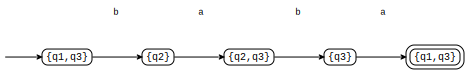

In [16]:
run(d4, "b a b a")

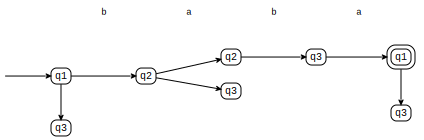

In [17]:
run(n4, "b a b a")